# Project 3

In [32]:
using Plots, CSV, Lathe, DataFrames, MLBase, GLM, StatsBase, Statistics, LaTeXStrings, DataStructures
theme(:dark)

### Qestion 1

In [2]:
df1 = CSV.read("Salary_Data.csv", DataFrame)

,YearsExperience,Salary
,Float64,Float64
1,1.1,39343.0
2,1.3,46205.0
3,1.5,37731.0
4,2.0,43525.0
5,2.2,39891.0
6,2.9,56642.0
7,3.0,60150.0
8,3.2,54445.0
9,3.2,64445.0


In [3]:
names(df1)

2-element Vector{String}:
 "YearsExperience"
 "Salary"

In [4]:
cor(df1."YearsExperience", df1."Salary")

0.9782416184887598

#### *Train-Test Split*

In [7]:
using Lathe.preprocess: TrainTestSplit
train, test = TrainTestSplit(df1, .75)

(22×2 DataFrame
 Row │ YearsExperience  Salary   
     │ Float64          Float64  
─────┼───────────────────────────
   1 │             1.1   39343.0
   2 │             1.3   46205.0
   3 │             1.5   37731.0
   4 │             2.9   56642.0
   5 │             3.0   60150.0
   6 │             3.2   54445.0
   7 │             3.7   57189.0
   8 │             4.0   55794.0
   9 │             4.0   56957.0
  10 │             4.5   61111.0
  11 │             4.9   67938.0
  12 │             5.1   66029.0
  13 │             5.3   83088.0
  14 │             5.9   81363.0
  15 │             6.0   93940.0
  16 │             6.8   91738.0
  17 │             7.9  101302.0
  18 │             8.2  113812.0
  19 │             8.7  109431.0
  20 │             9.0  105582.0
  21 │             9.6  112635.0
  22 │            10.5  121872.0, 8×2 DataFrame
 Row │ YearsExperience  Salary   
     │ Float64          Float64  
─────┼───────────────────────────
   1 │             2.0   43525.0
   2 │

In [8]:
ols = lm(@formula(YearsExperience ~ Salary), train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

YearsExperience ~ 1 + Salary

Coefficients:
─────────────────────────────────────────────────────────────────────────────────
                    Coef.  Std. Error      t  Pr(>|t|)    Lower 95%     Upper 95%
─────────────────────────────────────────────────────────────────────────────────
(Intercept)  -2.46394      0.423478    -5.82    <1e-04  -3.3473      -1.58058
Salary        0.000102316  5.27337e-6  19.40    <1e-13   9.13156e-5   0.000113316
─────────────────────────────────────────────────────────────────────────────────

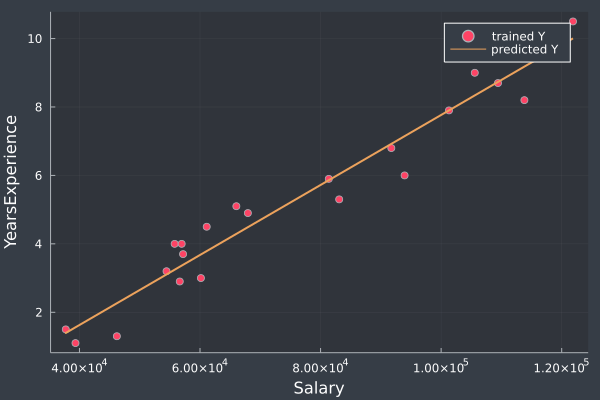

In [9]:
yp = predict(ols)
y2 = Base.hcat(train.YearsExperience, yp)
scatter(train.Salary, train.YearsExperience, label = "trained Y", ylabel = "YearsExperience", xlabel = "Salary")
plot!(train.Salary, yp, linewidth = 2, label = "predicted Y")

### Question 2

##### A)

In [10]:
df2 = CSV.read("50_Startups.csv", DataFrame)

,R&D Spend,Administration,Marketing Spend,State,Profit
,Float64,Float64,Float64,String15,Float64
1,1.65349e5,1.36898e5,4.71784e5,New York,1.92262e5
2,1.62598e5,1.51378e5,4.43899e5,California,1.91792e5
3,1.53442e5,1.01146e5,4.07935e5,Florida,1.9105e5
4,1.44372e5,1.18672e5,3.832e5,New York,182902.0
5,1.42107e5,91391.8,3.66168e5,Florida,1.66188e5
6,1.31877e5,99814.7,3.62861e5,New York,1.56991e5
7,1.34615e5,1.47199e5,1.27717e5,California,1.56123e5
8,1.30298e5,1.4553e5,3.23877e5,Florida,1.55753e5
9,1.20543e5,148719.0,3.11613e5,New York,1.52212e5


In [11]:
colnames = Symbol[]
for i in string.(names(df2))
    push!(colnames,Symbol(replace(replace(replace(replace(strip(i)," " => "_"),"-" => "_"), "/" => "_"), "&" => "_")))
end

rename!(df2, colnames);

In [12]:
train, test = TrainTestSplit(df2,.75)

(36×5 DataFrame
 Row │ R_D_Spend       Administration  Marketing_Spend  State       Profit     ⋯
     │ Float64         Float64         Float64          String15    Float64    ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │      1.65349e5       1.36898e5        4.71784e5  New York         1.922 ⋯
   2 │      1.62598e5       1.51378e5        4.43899e5  California       1.917
   3 │      1.53442e5       1.01146e5        4.07935e5  Florida          1.910
   4 │      1.44372e5       1.18672e5        3.832e5    New York    182902.0
   5 │      1.42107e5   91391.8              3.66168e5  Florida          1.661 ⋯
   6 │      1.34615e5       1.47199e5        1.27717e5  California       1.561
   7 │      1.01913e5       1.10594e5   229161.0        Florida     146122.0
   8 │ 100672.0         91790.6              2.49745e5  California       1.442
   9 │  91992.4             1.35495e5        2.52665e5  California       1.343 ⋯
  10 │      1.19943e5       

In [14]:
names(df2)

5-element Vector{String}:
 "R_D_Spend"
 "Administration"
 "Marketing_Spend"
 "State"
 "Profit"

In [15]:
OSL1 = lm(@formula(Profit~R_D_Spend), train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Profit ~ 1 + R_D_Spend

Coefficients:
───────────────────────────────────────────────────────────────────────────────────
                   Coef.    Std. Error      t  Pr(>|t|)     Lower 95%     Upper 95%
───────────────────────────────────────────────────────────────────────────────────
(Intercept)  46421.3      3277.46       14.16    <1e-15  39760.7       53081.9
R_D_Spend        0.88224     0.0375182  23.51    <1e-21      0.805994      0.958486
───────────────────────────────────────────────────────────────────────────────────

In [16]:
OSL2 = lm(@formula(Profit~Administration), train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Profit ~ 1 + Administration

Coefficients:
──────────────────────────────────────────────────────────────────────────────────
                       Coef.    Std. Error     t  Pr(>|t|)    Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────────────
(Intercept)     75518.3       32541.9       2.32    0.0264  9385.2       1.41651e5
Administration      0.298411      0.259756  1.15    0.2587    -0.229476  0.826298
──────────────────────────────────────────────────────────────────────────────────

In [17]:
OSL3 = lm(@formula(Profit~Marketing_Spend), train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Profit ~ 1 + Marketing_Spend

Coefficients:
───────────────────────────────────────────────────────────────────────────────────────
                        Coef.    Std. Error     t  Pr(>|t|)     Lower 95%     Upper 95%
───────────────────────────────────────────────────────────────────────────────────────
(Intercept)      59872.3       7977.91       7.50    <1e-07  43659.2       76085.4
Marketing_Spend      0.264441     0.0340922  7.76    <1e-08      0.195157      0.333725
───────────────────────────────────────────────────────────────────────────────────────

In [18]:
println("R_squared for profit regression on R&D Spend = $(r2(OSL1))")
println("R_squared for profit regression on Administration = $(r2(OSL2))")
println("R_squared for profit regression on Marketing spend = $(r2(OSL3))")

R_squared for profit regression on R&D Spend = 0.9420739327933163
R_squared for profit regression on Administration = 0.037366458283801696
R_squared for profit regression on Marketing spend = 0.6389338850475537


##### B)

In [19]:
OSL = lm(@formula(Profit~ R_D_Spend + Administration +Marketing_Spend), train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Profit ~ 1 + R_D_Spend + Administration + Marketing_Spend

Coefficients:
────────────────────────────────────────────────────────────────────────────────────────────
                         Coef.    Std. Error      t  Pr(>|t|)       Lower 95%      Upper 95%
────────────────────────────────────────────────────────────────────────────────────────────
(Intercept)      47831.1        8317.48        5.75    <1e-05  30888.9         64773.2
R_D_Spend            0.795513      0.0602685  13.20    <1e-13      0.67275         0.918276
Administration      -0.0286307     0.0661218  -0.43    0.6679     -0.163316        0.106055
Marketing_Spend      0.0433113     0.0212731   2.04    0.0501     -2.05155e-5      0.0866431
────────────────────────────────────────────────────────────────────────────────────────────

In [20]:
OSL12 = lm(@formula(Profit~ R_D_Spend + Administration ), train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Profit ~ 1 + R_D_Spend + Administration

Coefficients:
─────────────────────────────────────────────────────────────────────────────────────────
                        Coef.    Std. Error      t  Pr(>|t|)     Lower 95%      Upper 95%
─────────────────────────────────────────────────────────────────────────────────────────
(Intercept)     54459.6        8010.25        6.80    <1e-07  38162.6       70756.6
R_D_Spend           0.892599      0.0385731  23.14    <1e-21      0.814121      0.971076
Administration     -0.0720035     0.0655111  -1.10    0.2797     -0.205287      0.0612798
─────────────────────────────────────────────────────────────────────────────────────────

In [21]:
OSL13 = lm(@formula(Profit~ R_D_Spend +Marketing_Spend), train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Profit ~ 1 + R_D_Spend + Marketing_Spend

Coefficients:
──────────────────────────────────────────────────────────────────────────────────────────
                        Coef.    Std. Error      t  Pr(>|t|)       Lower 95%     Upper 95%
──────────────────────────────────────────────────────────────────────────────────────────
(Intercept)      44512.4       3190.68       13.95    <1e-14  38020.9         51003.9
R_D_Spend            0.785169     0.0546465  14.37    <1e-15      0.67399         0.896348
Marketing_Spend      0.046279     0.0198893   2.33    0.0263      0.00581398      0.086744
──────────────────────────────────────────────────────────────────────────────────────────

In [22]:
OSL23 = lm(@formula(Profit~ Administration +Marketing_Spend), train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Profit ~ 1 + Administration + Marketing_Spend

Coefficients:
───────────────────────────────────────────────────────────────────────────────────────────
                        Coef.     Std. Error     t  Pr(>|t|)        Lower 95%     Upper 95%
───────────────────────────────────────────────────────────────────────────────────────────
(Intercept)      20848.7       20154.8        1.03    0.3085  -20156.4         61853.9
Administration       0.317313      0.151755   2.09    0.0443       0.00856453      0.626062
Marketing_Spend      0.265479      0.0325215  8.16    <1e-08       0.199313        0.331644
───────────────────────────────────────────────────────────────────────────────────────────

In [23]:
println("R_squared for profit regression on R&D Spend and Administration = $(r2(OSL12))")
println("R_squared for profit regression on R&D Spend and Marketing Spend = $(r2(OSL13))")
println("R_squared for profit regression on Administration and Marketing Spend = $(r2(OSL23))")
println("R_squared for profit regression on all three types of expenses = $(r2(OSL))")

R_squared for profit regression on R&D Spend and Administration = 0.9441195461241098
R_squared for profit regression on R&D Spend and Marketing Spend = 0.950238123786766
R_squared for profit regression on Administration and Marketing Spend = 0.6811742320530835
R_squared for profit regression on all three types of expenses = 0.9505279807937047


##### C)

In [33]:
states = OrderedSet(df2.State)

OrderedSet{String15} with 3 elements:
  "New York"
  "California"
  "Florida"

In [54]:
train_NY = train[findall(x -> x == states[1], train[!,end-1]),:]
train_Califronia = train[findall(x -> x == states[2], train[!,end-1]),:]
train_Florida = train[findall(x -> x == states[3], train[!,end-1]),:]

,R_D_Spend,Administration,Marketing_Spend,State,Profit
,Float64,Float64,Float64,String15,Float64
1,1.53442e5,1.01146e5,4.07935e5,Florida,1.9105e5
2,1.42107e5,91391.8,3.66168e5,Florida,1.66188e5
3,1.01913e5,1.10594e5,229161.0,Florida,146122.0
4,1.19943e5,1.56547e5,2.56513e5,Florida,1.32603e5
5,73994.6,1.22783e5,3.03319e5,Florida,1.10352e5
6,67532.5,105751.0,3.04769e5,Florida,108734.0
7,75328.9,144136.0,1.3405e5,Florida,1.05734e5
8,61994.5,1.15641e5,91131.2,Florida,99937.6
9,55493.9,1.03057e5,2.14635e5,Florida,96778.9


In [57]:
NY = lm(@formula(Profit ~ Marketing_Spend), train_NY)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Profit ~ 1 + Marketing_Spend

Coefficients:
───────────────────────────────────────────────────────────────────────────────────────
                        Coef.    Std. Error     t  Pr(>|t|)     Lower 95%     Upper 95%
───────────────────────────────────────────────────────────────────────────────────────
(Intercept)      67801.9       11882.4       5.71    0.0001  41648.9       93954.9
Marketing_Spend      0.232923      0.050334  4.63    0.0007      0.122138      0.343707
───────────────────────────────────────────────────────────────────────────────────────

In [58]:
California = lm(@formula(Profit ~ Marketing_Spend), train_Califronia)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Profit ~ 1 + Marketing_Spend

Coefficients:
───────────────────────────────────────────────────────────────────────────────────────
                        Coef.     Std. Error     t  Pr(>|t|)    Lower 95%     Upper 95%
───────────────────────────────────────────────────────────────────────────────────────
(Intercept)      50236.3       14345.2        3.50    0.0050  18662.7      81810.0
Marketing_Spend      0.317831      0.0710186  4.48    0.0009      0.16152      0.474142
───────────────────────────────────────────────────────────────────────────────────────

In [59]:
Florida = lm(@formula(Profit ~ Marketing_Spend), train_Florida)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Profit ~ 1 + Marketing_Spend

Coefficients:
──────────────────────────────────────────────────────────────────────────────────────
                        Coef.     Std. Error     t  Pr(>|t|)      Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────────────────
(Intercept)      61303.0       21351.4        2.87    0.0208  12066.6         1.1054e5
Marketing_Spend      0.253179      0.0797671  3.17    0.0131      0.0692357   0.437122
──────────────────────────────────────────────────────────────────────────────────────

### Questen 3

In [60]:
df3 = CSV.read("Social_Network_Ads.csv", DataFrame)

,Age,EstimatedSalary,Purchased
,Int64,Int64,Int64
1,19,19000,0
2,35,20000,0
3,26,43000,0
4,27,57000,0
5,19,76000,0
6,27,58000,0
7,27,84000,0
8,32,150000,1
9,25,33000,0


##### A)

In [61]:
train, test = TrainTestSplit(df3, .75)

(308×3 DataFrame
 Row │ Age    EstimatedSalary  Purchased 
     │ Int64  Int64            Int64     
─────┼───────────────────────────────────
   1 │    19            19000          0
   2 │    35            20000          0
   3 │    27            57000          0
   4 │    27            58000          0
   5 │    27            84000          0
   6 │    32           150000          1
   7 │    25            33000          0
   8 │    35            65000          0
   9 │    26            80000          0
  10 │    26            52000          0
  11 │    32            18000          0
  ⋮  │   ⋮           ⋮             ⋮
 299 │    42            64000          0
 300 │    48            33000          1
 301 │    44           139000          1
 302 │    39            71000          0
 303 │    47            34000          1
 304 │    48            33000          1
 305 │    39            59000          0
 306 │    46            41000          1
 307 │    50            20000          1


In [63]:
countmap(df3.Purchased)

Dict{Int64, Int64} with 2 entries:
  0 => 257
  1 => 143

In [65]:
logit = glm(@formula(Purchased ~ EstimatedSalary + Age), train, Binomial(), ProbitLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, ProbitLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Purchased ~ 1 + EstimatedSalary + Age

Coefficients:
───────────────────────────────────────────────────────────────────────────────────
                       Coef.  Std. Error      z  Pr(>|z|)    Lower 95%    Upper 95%
───────────────────────────────────────────────────────────────────────────────────
(Intercept)      -6.86903     0.732717    -9.37    <1e-20  -8.30512     -5.43293
EstimatedSalary   2.14167e-5  3.39041e-6   6.32    <1e-09   1.47716e-5   2.80618e-5
Age               0.122373    0.0144556    8.47    <1e-16   0.0940411    0.150706
───────────────────────────────────────────────────────────────────────────────────

In [70]:
prediction = predict(logit, test)
prediction_class = [if x<0.5 0 else 1 end for x in prediction]
compare_df = DataFrame("actual_class" => test.Purchased, "predicted_class" => prediction_class, "prediction_prob" => prediction)

,actual_class,predicted_class,prediction_prob
,Int64,Int64,Float64?
1,0,0,0.00283399
2,0,0,0.00177129
3,0,0,0.00494406
4,1,0,0.472872
5,1,0,0.453425
6,1,0,0.227453
7,1,0,0.245369
8,1,0,0.392405
9,0,0,0.0082138


In [72]:
confusion_matrix1 = MLBase.roc(compare_df."actual_class", compare_df."predicted_class")

ROCNums{Int64}
  p = 44
  n = 48
  tp = 25
  tn = 44
  fp = 4
  fn = 19


##### B)